In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import pandas as pd 
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 


In [2]:
dataRaw = pd.read_csv('SampleInputCut.txt', sep='\s+', header=None, dtype =str)
RawTS = dataRaw.copy()
print(RawTS.shape)
RawTS.columns = ['year', 'day', 'hour', 'minute', 'second', 'millisecond', 'val1', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7', 'val8', 'val9', 'val10', 'val11', 'val12', 'val13', 'val14', 'val15', 'val16', 'val17', 'val18', 'val19', 'val20', 'val21', 'val22']
RawTS.reset_index(inplace=True)
RawTS.rename(columns={'index': 'Serial Number'}, inplace=True)
RawTS.head(5)

(20022, 28)


,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,2018,128,00,02,05,038,04,-0.04690,-0.03850,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,1,2018,128,00,02,10,158,14,-0.04690,-0.03850,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2,2018,128,00,02,11,694,17,-0.04690,-0.03850,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,3,2018,128,00,02,13,230,20,-0.04690,-0.03850,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,4,2018,128,00,02,14,254,22,-0.04690,-0.03850,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [3]:
new_col = RawTS['year'].astype(str) + RawTS["day"].astype(str) +RawTS['hour'].astype(str) + RawTS["minute"].astype(str)+RawTS['second'].astype(str) + RawTS["millisecond"].astype(str)+ RawTS["val1"].astype(str)

In [4]:
RawTS.insert(loc=1, column='TimeStamp', value=new_col)

In [5]:
RawTS.head()

,Serial Number,TimeStamp,year,day,hour,minute,second,millisecond,val1,val2,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,201812800020503804,2018,128,00,02,05,038,04,-0.04690,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,1,201812800021015814,2018,128,00,02,10,158,14,-0.04690,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2,201812800021169417,2018,128,00,02,11,694,17,-0.04690,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,3,201812800021323020,2018,128,00,02,13,230,20,-0.04690,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,4,201812800021425422,2018,128,00,02,14,254,22,-0.04690,...,51.00,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [6]:
unique_values14 = RawTS['val14'].unique()
unique_values15 = RawTS['val15'].unique()
unique_values16 = RawTS['val16'].unique()
unique_values17 = RawTS['val17'].unique()
unique_values18 = RawTS['val18'].unique()
unique_values19 = RawTS['val19'].unique()
unique_values20 = RawTS['val20'].unique()
unique_values21 = RawTS['val21'].unique()
unique_values22 = RawTS['val22'].unique()
# print the unique values
print(unique_values14)
print(unique_values15)
print(unique_values16)
print(unique_values17)
print(unique_values18)
print(unique_values19)
print(unique_values20)
print(unique_values21)
print(unique_values22)

['SYNC' 'NO_SYNC']
['ON' 'OFF']
['ON' 'OFF']
['ON' 'OFF']
['SYNC' 'NO_SYNC']
['NOT_USBL']
['ENA' 'DIS']
['LOW']
['ON' 'OFF']


In [8]:
RawTS['val14'] = RawTS['val14'].replace({'SYNC': 1, 'NO_SYNC': 0})
RawTS['val15'] = RawTS['val15'].replace({'ON': 1, 'OFF': 0})
RawTS['val16'] = RawTS['val16'].replace({'ON': 1, 'OFF': 0})
RawTS['val17'] = RawTS['val17'].replace({'ON': 1, 'OFF': 0})
RawTS['val18'] = RawTS['val18'].replace({'SYNC': 1, 'NO_SYNC': 0})
#RawTS['val19'] = RawTS['val19'].replace({'USBL': 1, 'NOT_USBL': 0})
RawTS['val22'] = RawTS['val22'].replace({'ON': 1, 'OFF': 0})
RawTS['val20'] = RawTS['val22'].replace({'ENA': 1, 'DIS': 0})
RawTS = RawTS.drop('val21', axis=1)
RawTS = RawTS.drop('val19', axis=1)
RawTS = RawTS.drop('val1', axis=1)
RawTS = RawTS.drop('year', axis=1)
RawTS = RawTS.drop('day', axis=1)
RawTS = RawTS.drop('hour', axis=1)
RawTS = RawTS.drop('minute', axis=1)
RawTS = RawTS.drop('second', axis=1)
RawTS = RawTS.drop('millisecond', axis=1)

#RawTS['val1'] = RawTS['val1'].replace(RawTS['val1']/4)
RawTS.head()

,Serial Number,TimeStamp,val2,val3,val4,val5,val6,val7,val8,val9,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
0,0,201812800020503804,-0.04690,-0.03850,0.00562,0.01096,-0.09810,-0.06870,0.00641,0.00789,...,51.00,38.00,51.00,1,1,1,1,1,1,1
1,1,201812800021015814,-0.04690,-0.03850,0.00562,0.01096,-0.09810,-0.06870,0.00641,0.00789,...,51.00,38.00,51.00,1,1,1,1,1,1,1
2,2,201812800021169417,-0.04690,-0.03850,0.00562,0.01096,-0.09810,-0.06870,0.00641,0.00789,...,51.00,38.00,51.00,1,1,1,1,1,1,1
3,3,201812800021323020,-0.04690,-0.03850,0.00562,0.01096,-0.09810,-0.06870,0.00641,0.00789,...,51.00,38.00,51.00,1,1,1,1,1,1,1
4,4,201812800021425422,-0.04690,-0.03850,0.00562,0.01096,-0.09810,-0.06870,0.00641,0.00789,...,51.00,38.00,51.00,1,1,1,1,1,1,1


In [9]:
labels = pd.read_csv('SampleInputCut.txt', sep='\s+', header=None)
print(labels.shape)
labels.head()

(20022, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2018,128,0,2,5,38,4,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,2018,128,0,2,10,158,14,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2018,128,0,2,11,694,17,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,2018,128,0,2,13,230,20,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,2018,128,0,2,14,254,22,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [10]:
labels.value_counts(), labels.value_counts(normalize=True)

(0     1    2   3   4   5    6   7        8        9        10       11       12       13       14       15    16    17    18    19    20  21  22  23    24        25   26   27
 2018  128  0   2   5   38   4   -0.0469  -0.0385  0.00562  0.01096  -0.0981  -0.0687  0.00641  0.00789  37.0  51.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
       130  9   51  13  767  14  -0.0469  -0.0385  0.00582  0.01091   0.1294  -0.0687  0.00661  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                55  30  793  4   -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                51  21  447  29  -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                    19  911  26  -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00

In [11]:
print('Any missing value ?',RawTS.isnull().values.any())

Any missing value ? False


In [12]:
RawTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial Number  20022 non-null  int64 
 1   TimeStamp      20022 non-null  object
 2   val2           20022 non-null  object
 3   val3           20022 non-null  object
 4   val4           20022 non-null  object
 5   val5           20022 non-null  object
 6   val6           20022 non-null  object
 7   val7           20022 non-null  object
 8   val8           20022 non-null  object
 9   val9           20022 non-null  object
 10  val10          20022 non-null  object
 11  val11          20022 non-null  object
 12  val12          20022 non-null  object
 13  val13          20022 non-null  object
 14  val14          20022 non-null  int64 
 15  val15          20022 non-null  int64 
 16  val16          20022 non-null  int64 
 17  val17          20022 non-null  int64 
 18  val18          20022 non-n

In [13]:
RawTS['TimeStamp'] = RawTS['TimeStamp'].astype(float)
for i in range(2,14):
    RawTS[f'val{i}']=RawTS[f'val{i}'].astype(float)

In [14]:
RawTS.describe()

,Serial Number,TimeStamp,val2,val3,val4,val5,val6,val7,val8,val9,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
count,20022.000000,2.002200e+04,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,...,20022.00000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000
mean,10010.500000,2.018129e+17,0.264992,0.075640,0.006048,0.011250,0.006992,0.008653,0.006717,0.008094,...,48.86380,35.497253,46.411547,0.884427,0.885476,0.963840,0.886824,0.962791,0.964389,0.964389
std,5779.997881,8.603834e+10,1.686209,0.808694,0.002373,0.001529,0.604923,0.710710,0.001163,0.001452,...,6.94326,23.236098,10.187824,0.319720,0.318455,0.186693,0.316815,0.189278,0.185322,0.185322
min,0.000000,2.018128e+17,-9.631300,-1.687700,-0.000450,0.004650,-1.008100,-1.841500,0.000310,0.001990,...,12.00000,15.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5005.250000,2.018128e+17,-0.046900,-0.038500,0.005520,0.010910,-0.098100,-0.068700,0.006460,0.007840,...,49.00000,34.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10010.500000,2.018129e+17,-0.046900,-0.038500,0.005770,0.011110,-0.098100,-0.068700,0.006560,0.008040,...,51.00000,38.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,15015.750000,2.018130e+17,-0.046900,-0.038500,0.005820,0.011310,-0.098100,-0.068700,0.006710,0.008090,...,52.00000,38.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20021.000000,2.018130e+17,10.678500,7.265100,0.012560,0.017520,4.679400,6.136100,0.012760,0.014640,...,53.00000,999.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# NORMALIZE data
x = RawTS.values 
StandardScaler = StandardScaler()
x_scaled = StandardScaler.fit_transform(x)
dfNorm = pd.DataFrame(x_scaled, columns=RawTS.columns)
print(dfNorm.shape)
dfNorm.head()

(20022, 21)


,Serial Number,TimeStamp,val2,val3,val4,val5,val6,val7,val8,val9,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
0,-1.731964,-1.481581,-0.184971,-0.141145,-0.180335,-0.189535,-0.173732,-0.108842,-0.263521,-0.140807,...,0.307673,0.107712,0.450397,0.361491,0.359633,0.193693,0.357238,0.196589,0.192161,0.192161
1,-1.731791,-1.481575,-0.184971,-0.141145,-0.180335,-0.189535,-0.173732,-0.108842,-0.263521,-0.140807,...,0.307673,0.107712,0.450397,0.361491,0.359633,0.193693,0.357238,0.196589,0.192161,0.192161
2,-1.731618,-1.481574,-0.184971,-0.141145,-0.180335,-0.189535,-0.173732,-0.108842,-0.263521,-0.140807,...,0.307673,0.107712,0.450397,0.361491,0.359633,0.193693,0.357238,0.196589,0.192161,0.192161
3,-1.731445,-1.481572,-0.184971,-0.141145,-0.180335,-0.189535,-0.173732,-0.108842,-0.263521,-0.140807,...,0.307673,0.107712,0.450397,0.361491,0.359633,0.193693,0.357238,0.196589,0.192161,0.192161
4,-1.731272,-1.481571,-0.184971,-0.141145,-0.180335,-0.189535,-0.173732,-0.108842,-0.263521,-0.140807,...,0.307673,0.107712,0.450397,0.361491,0.359633,0.193693,0.357238,0.196589,0.192161,0.192161


In [16]:
RawTS.corr()

,Serial Number,TimeStamp,val2,val3,val4,val5,val6,val7,val8,val9,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
Serial Number,1.000000,0.953801,0.160657,0.164311,0.155746,0.082826,0.156341,0.152394,0.151465,0.149683,...,-0.394294,-0.114410,-0.420091,-0.287386,-0.284166,-0.180928,-0.282522,-0.185965,-0.181244,-0.181244
TimeStamp,0.953801,1.000000,0.191667,0.148911,0.174303,0.076163,0.130064,0.131909,0.122594,0.141730,...,-0.400663,-0.115200,-0.472023,-0.361832,-0.358758,-0.194813,-0.357413,-0.199757,-0.195201,-0.195201
val2,0.160657,0.191667,1.000000,0.300306,0.788342,0.159159,0.270222,0.308556,0.239978,0.313432,...,-0.079110,-0.026485,-0.331050,-0.362362,-0.364900,0.027934,-0.368109,0.027756,0.026644,0.026644
val3,0.164311,0.148911,0.300306,1.000000,0.361725,0.781083,0.935192,0.893251,0.826898,0.601679,...,-0.034360,-0.035674,0.012843,0.061127,0.059854,0.017986,0.058414,0.017446,0.016994,0.016994
val4,0.155746,0.174303,0.788342,0.361725,1.000000,0.167773,0.336310,0.452151,0.266704,0.635207,...,-0.102377,-0.004626,-0.265434,-0.271583,-0.272547,-0.005198,-0.273971,-0.006120,-0.006089,-0.006089
val5,0.082826,0.076163,0.159159,0.781083,0.167773,1.000000,0.667765,0.557183,0.766712,0.310229,...,-0.052445,-0.015215,0.035365,0.096140,0.096195,0.017126,0.096329,0.017424,0.017149,0.017149
val6,0.156341,0.130064,0.270222,0.935192,0.336310,0.667765,1.000000,0.929562,0.843408,0.605396,...,-0.023294,-0.028296,0.064663,0.120380,0.120640,-0.002471,0.119042,-0.002367,-0.002801,-0.002801
val7,0.152394,0.131909,0.308556,0.893251,0.452151,0.557183,0.929562,1.000000,0.712369,0.775771,...,-0.025741,-0.031256,0.047114,0.097311,0.098024,-0.000273,0.096839,0.000251,-0.000682,-0.000682
val8,0.151465,0.122594,0.239978,0.826898,0.266704,0.766712,0.843408,0.712369,1.000000,0.444184,...,-0.026415,-0.026533,0.005105,0.047359,0.047232,0.015829,0.046829,0.015338,0.016849,0.016849
val9,0.149683,0.141730,0.313432,0.601679,0.635207,0.310229,0.605396,0.775771,0.444184,1.000000,...,-0.078159,-0.069416,-0.090214,-0.059250,-0.058750,-0.029204,-0.058448,-0.027943,-0.030051,-0.030051


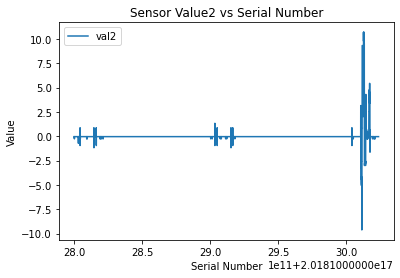

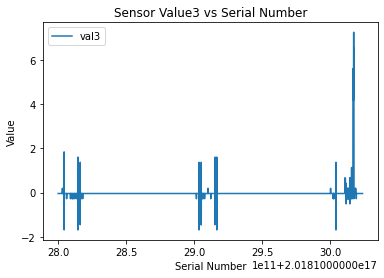

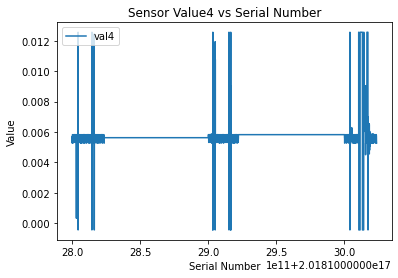

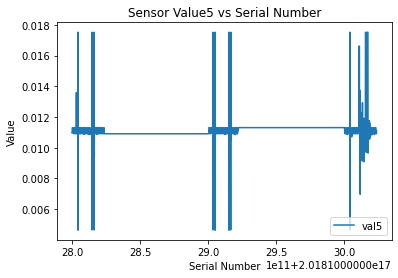

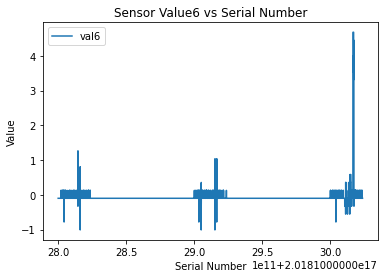

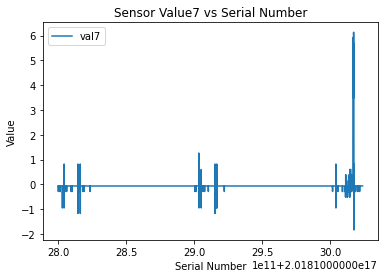

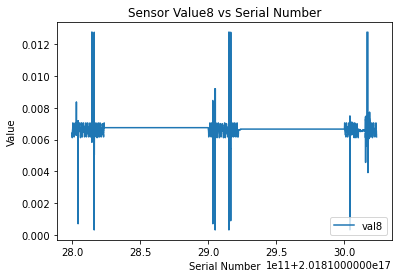

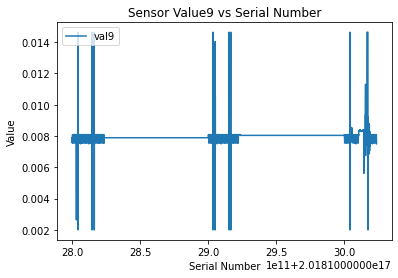

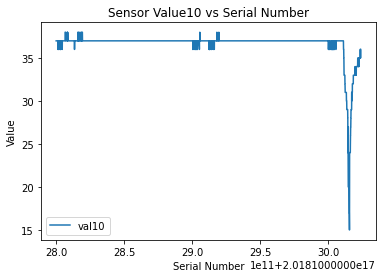

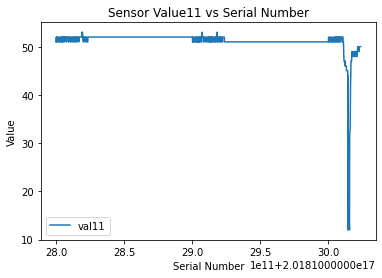

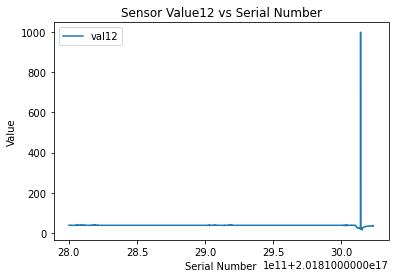

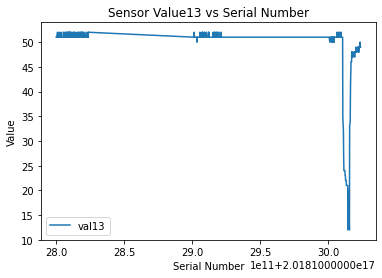

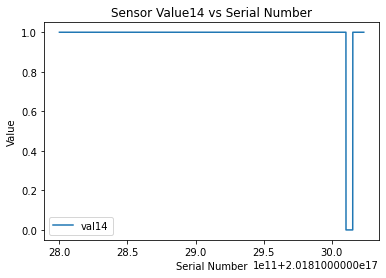

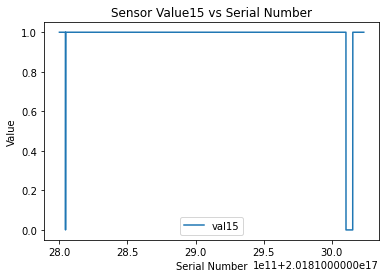

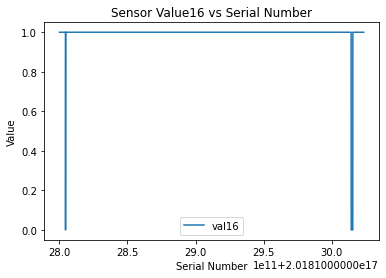

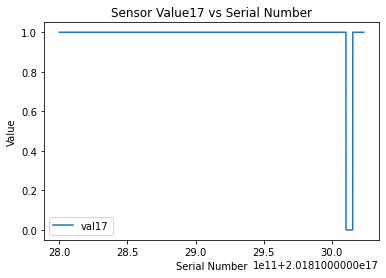

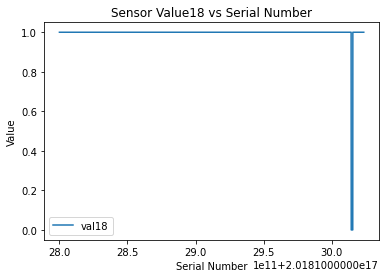

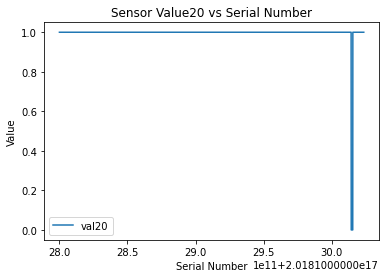

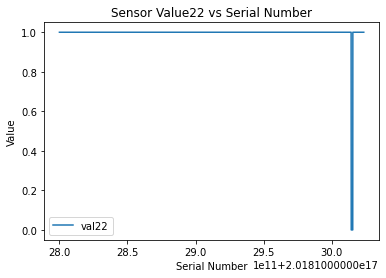

In [17]:
for i in range(2, 23):
    # Plot the column against the 'Serial Number' column
    if i==19 or i==21:
        continue
    else:
        plt.plot(RawTS['TimeStamp'], RawTS[f'val{i}'], label=f'val{i}')
        plt.xlabel('Serial Number')
        plt.ylabel('Value')
        plt.title(f'Sensor Value{i} vs Serial Number')
        plt.legend()

# Show the plot
        plt.show()
    


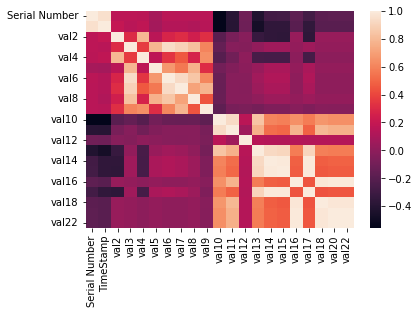

In [18]:
dataplot=sns.heatmap(RawTS.corr())
  
# displaying heatmap
plt.show()

# Using ADTK

In [19]:
RawTS['TimeStamp'] = pd.to_datetime(RawTS['TimeStamp'])

In [20]:
>>> import pandas as pd
>>> s_train = pd.read_csv("./datatrial.csv", index_col="TimeStamp", parse_dates=True, squeeze=True)
>>> from adtk.data import validate_series
>>> s_train = validate_series(s_train)
>>> print(s_train)

                               Unnamed: 0  Serial Number    val2    val3  \
TimeStamp                                                                  
1976-05-24 19:06:40.020503808           0              0 -0.0469 -0.0385   
1976-05-24 19:06:40.021015808           1              1 -0.0469 -0.0385   
1976-05-24 19:06:40.021169408           2              2 -0.0469 -0.0385   
1976-05-24 19:06:40.021323008           3              3 -0.0469 -0.0385   
1976-05-24 19:06:40.021425408           4              4 -0.0469 -0.0385   
...                                   ...            ...     ...     ...   
1976-05-24 19:10:23.582017120       20017          20017 -0.0469 -0.0385   
1976-05-24 19:10:23.582119520       20018          20018 -0.0469 -0.0385   
1976-05-24 19:10:23.582170720       20019          20019 -0.0469 -0.0385   
1976-05-24 19:10:23.582324320       20020          20020 -0.0469 -0.0385   
1976-05-24 19:10:23.582477920       20021          20021 -0.0469 -0.0385   

           

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

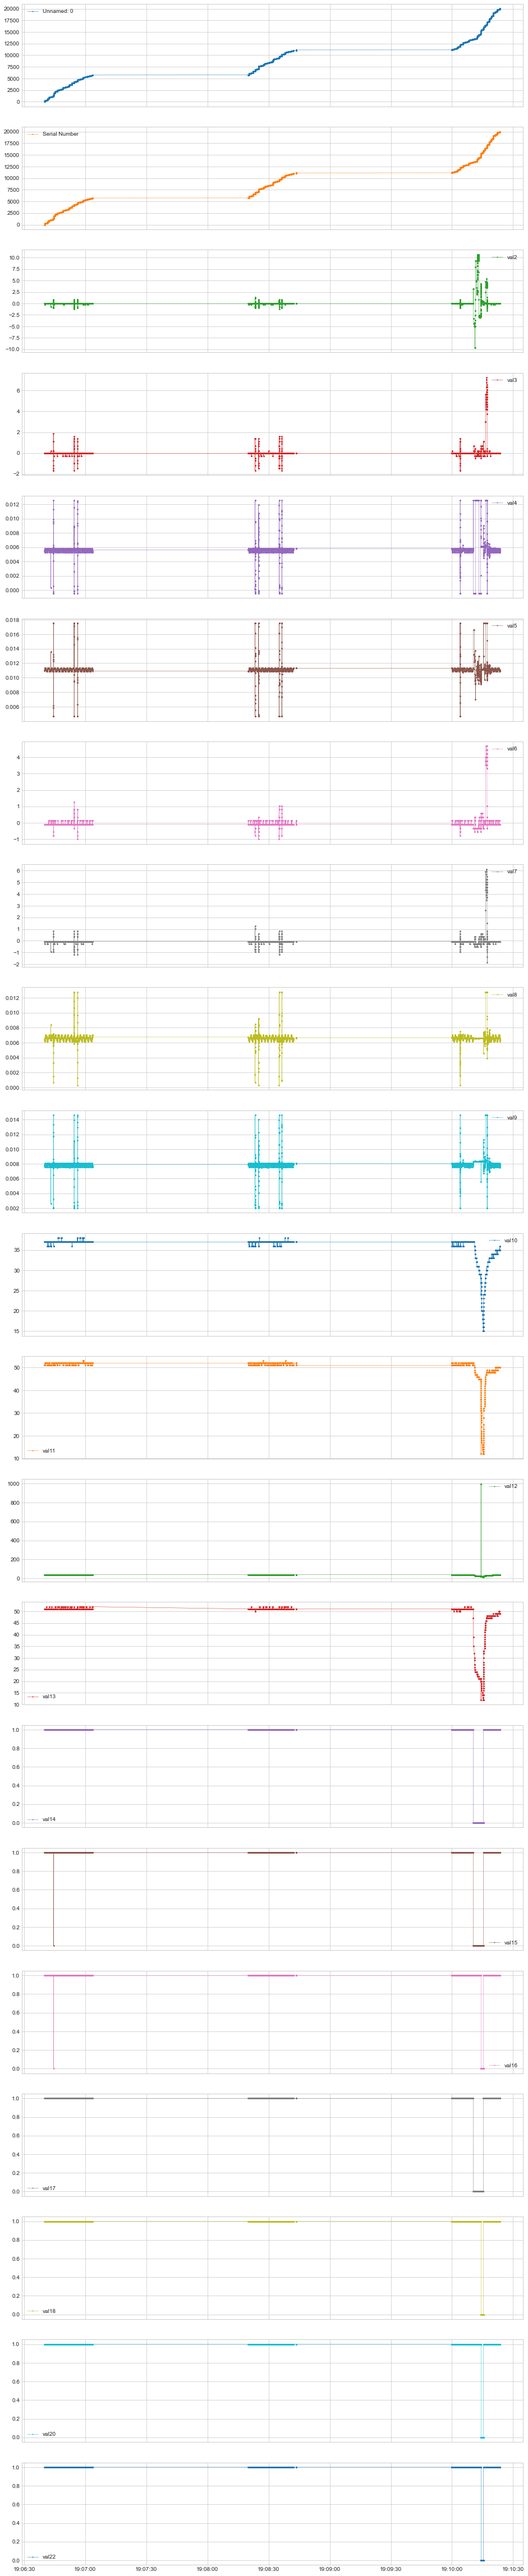

In [21]:
>>> from adtk.visualization import plot
>>> plot(s_train)

ANOMALY DETECTED AT 2018 130th day , 19th hour , 10th minute